In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta, date, time
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pylab
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

In [36]:
# Сброс ограничений на число выводимых столбцов
pd.set_option('display.max_columns', None)

# Деревья решений

Рассмотрим пример построения дерева решений на данных о разновидностях цветка ириса:

In [37]:
iris = pd.read_excel('/Users/olgakalinina/Desktop/day03/datasets/iris.xlsx')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


[]

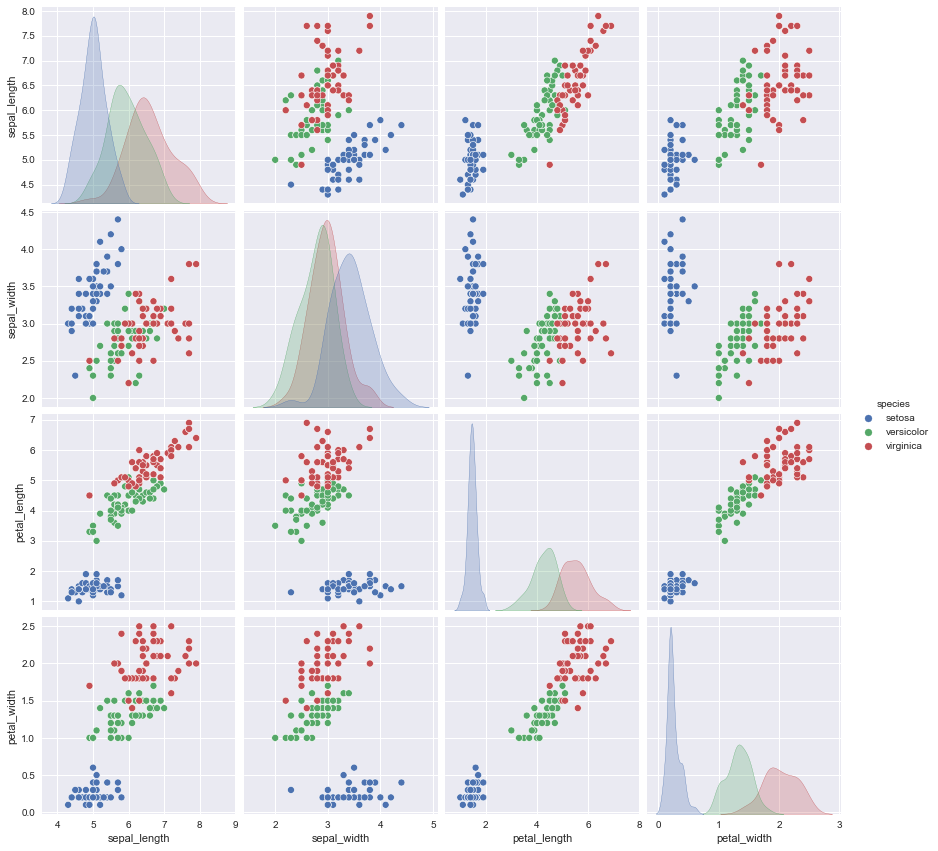

In [38]:
sns.pairplot(iris, hue="species", height=3)
plt.plot()

[]

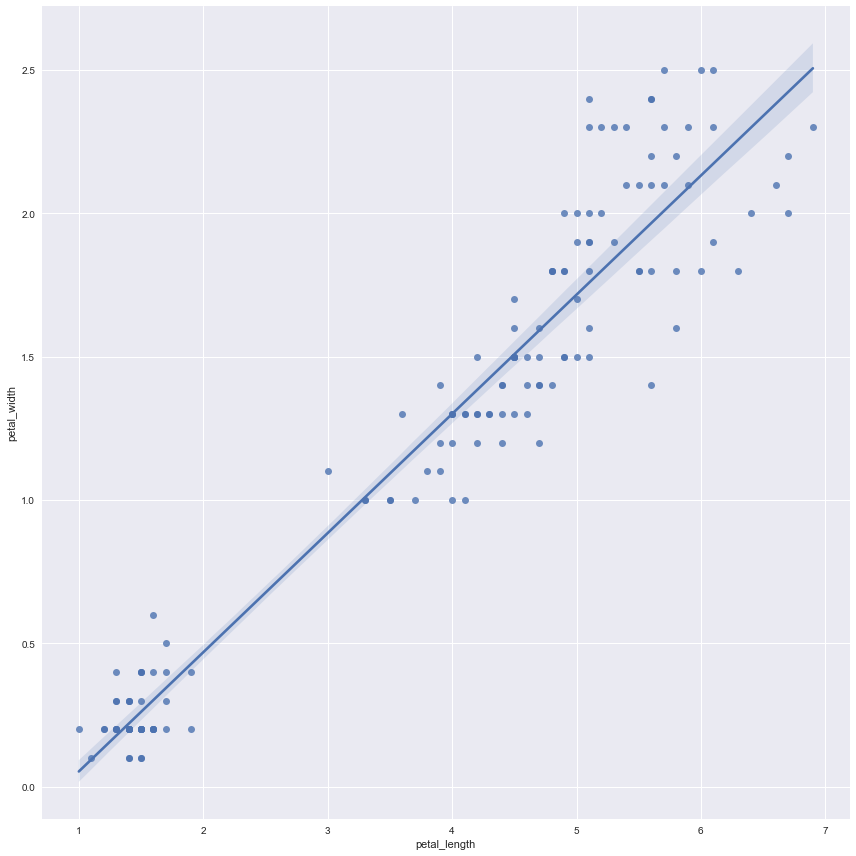

In [39]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, height=12)
plt.plot()

In [40]:
from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import Image, display
from sklearn.tree import export_graphviz

In [41]:
y = iris.species
X = iris.drop('species', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
tree = DecisionTreeClassifier(random_state=21,max_depth=3)
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.80      0.89        15
   virginica       0.77      1.00      0.87        10

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



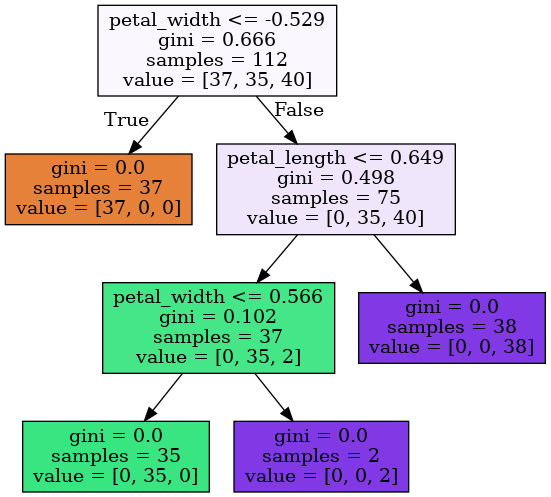

In [42]:
export_graphviz(tree, feature_names=X.columns , out_file='tree.dot', filled=True)
#!dot -Tpng 'tree.dot' -o 'tree.png'
display(Image('tree.png', unconfined=True))

---

# Метод ближайших соседей

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        13
  versicolor       0.87      0.87      0.87        15
   virginica       0.82      0.90      0.86        10

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.90      0.89      0.90        38



---

В файлах *iCafe 2 month.xlsx* и *iCafe 15 days.xlsx* содержатся данные для обучения и тестирования классификаторов. Требуется построить три классификатора:

- На основе логистической регрессии;
- На основе дерева решений;
- На основе метода ближайшего соседа.

Основная цель - это достичь значение $F_1$ метрики на выборке 15 дней не менее чем:
- 0.86 для логистической регрессии;
- 0.9 для дерева решений;
- 0.89 для метода ближайшего соседа.

Так же, необходимо провести анализ и сделать выводы о результатах, при изменении параметров:
- ***max_depth***, при обучении дерева решений;
- ***n_neighbors***, при обучении классификатора методом ближайшего соседа.

Опишите эти выводы текстом в блокноте с решением. При каких значениях гиперпараметров модели становятся максимально переобученными? Какова область значений гиперпараметров, в которой они могут повлиять на качество обучения модели?

---

In [45]:
"""Получение данных для обучения (2 месяца) и тестовых данных (15 дней)"""
df = pd.read_excel('/Users/olgakalinina/Desktop/day03/datasets/iCafe 2 month.xlsx')
df_15 = pd.read_excel('/Users/olgakalinina/Desktop/day03/datasets/iCafe 15 days.xlsx')

In [46]:
"просмотр df"
df

,Order_date_time,Delivery_time,Office,Rain
0,2020-09-01 0:15:10,10,1,1
1,2020-09-01 0:17:38,5,1,1
2,2020-09-01 0:20:23,17,1,1
3,2020-09-01 0:29:52,12,0,1
4,2020-09-01 0:32:52,9,1,1
...,...,...,...,...
20786,2020-10-31 23:28:08,4,1,1
20787,2020-10-31 23:39:56,10,1,1
20788,2020-10-31 23:43:11,9,1,1
20789,2020-10-31 23:47:56,9,1,1


In [47]:
"просмотр df_15"
df_15

,Order_date_time,Delivery_time,Office,Rain
0,2020-11-01 0:02:37,3,1,0.0
1,2020-11-01 0:09:50,15,0,0.0
2,2020-11-01 0:10:35,7,1,0.0
3,2020-11-01 0:13:08,8,1,0.0
4,2020-11-01 0:22:38,7,1,0.0
...,...,...,...,...
5468,2020-11-15 23:36:56,6,1,NaN
5469,2020-11-15 23:43:57,8,1,NaN
5470,2020-11-15 23:45:35,6,1,NaN
5471,2020-11-15 23:49:25,3,1,NaN


---

Просмотр данных указывает нам на две проблемы:

1. Столбец *Order_date_time* содержит одновременно информацию о дате и времени. Для удобства последующего анализа нам необходимо разделить данные столбца на столбец даты и столбец времени.
2. В *df_15* появились значения **NaN** (сокращение от Not a Number) — это специальное значение с плавающей точкой, распознаваемое всеми системами, которые используют стандартное представление IEEE с плавающей точкой. Это означает, что данные отсутствуют. Для дальнейшего анализа нам необходимо каким-либо образом обработать отсутствующие значения (либо удалить строки, либо заполнить значениями).

Решим первую проблему:

In [48]:
"""Разбиение даты и времени на отдельные столбцы"""
def share_date_time(df, sep = ' '):
    X = df.Order_date_time.str.split(pat = sep, expand = True)
    df['Order_date'], df['Order_time'] = X[0], X[1]
    return df

df = share_date_time(df)
df

,Order_date_time,Delivery_time,Office,Rain,Order_date,Order_time
0,2020-09-01 0:15:10,10,1,1,2020-09-01,0:15:10
1,2020-09-01 0:17:38,5,1,1,2020-09-01,0:17:38
2,2020-09-01 0:20:23,17,1,1,2020-09-01,0:20:23
3,2020-09-01 0:29:52,12,0,1,2020-09-01,0:29:52
4,2020-09-01 0:32:52,9,1,1,2020-09-01,0:32:52
...,...,...,...,...,...,...
20786,2020-10-31 23:28:08,4,1,1,2020-10-31,23:28:08
20787,2020-10-31 23:39:56,10,1,1,2020-10-31,23:39:56
20788,2020-10-31 23:43:11,9,1,1,2020-10-31,23:43:11
20789,2020-10-31 23:47:56,9,1,1,2020-10-31,23:47:56


In [49]:
df_15 = share_date_time(df_15)
df_15

,Order_date_time,Delivery_time,Office,Rain,Order_date,Order_time
0,2020-11-01 0:02:37,3,1,0.0,2020-11-01,0:02:37
1,2020-11-01 0:09:50,15,0,0.0,2020-11-01,0:09:50
2,2020-11-01 0:10:35,7,1,0.0,2020-11-01,0:10:35
3,2020-11-01 0:13:08,8,1,0.0,2020-11-01,0:13:08
4,2020-11-01 0:22:38,7,1,0.0,2020-11-01,0:22:38
...,...,...,...,...,...,...
5468,2020-11-15 23:36:56,6,1,NaN,2020-11-15,23:36:56
5469,2020-11-15 23:43:57,8,1,NaN,2020-11-15,23:43:57
5470,2020-11-15 23:45:35,6,1,NaN,2020-11-15,23:45:35
5471,2020-11-15 23:49:25,3,1,NaN,2020-11-15,23:49:25


---

Теперь займемся решением второй проблемы. Для начала посмотрим информацию от том, как заполнены столбцы датафреймов:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20791 entries, 0 to 20790
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order_date_time  20791 non-null  object
 1   Delivery_time    20791 non-null  int64 
 2   Office           20791 non-null  int64 
 3   Rain             20791 non-null  int64 
 4   Order_date       20791 non-null  object
 5   Order_time       20791 non-null  object
dtypes: int64(3), object(3)
memory usage: 974.7+ KB


---

В данных для обучения пропусков нет.

In [51]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_date_time  5473 non-null   object 
 1   Delivery_time    5473 non-null   int64  
 2   Office           5473 non-null   int64  
 3   Rain             4516 non-null   float64
 4   Order_date       5473 non-null   object 
 5   Order_time       5473 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 256.7+ KB


---

В тестовых данных пропуски содержатся только в столбце Rain. Показать часть датафрейма с пропусками в столбце можно так:

In [52]:
df_15[pd.isnull(df_15.Rain)]

,Order_date_time,Delivery_time,Office,Rain,Order_date,Order_time
4516,2020-11-13 0:07:38,8,1,NaN,2020-11-13,0:07:38
4517,2020-11-13 0:09:09,4,1,NaN,2020-11-13,0:09:09
4518,2020-11-13 0:09:23,8,1,NaN,2020-11-13,0:09:23
4519,2020-11-13 0:09:47,6,1,NaN,2020-11-13,0:09:47
4520,2020-11-13 0:11:56,6,1,NaN,2020-11-13,0:11:56
...,...,...,...,...,...,...
5468,2020-11-15 23:36:56,6,1,NaN,2020-11-15,23:36:56
5469,2020-11-15 23:43:57,8,1,NaN,2020-11-15,23:43:57
5470,2020-11-15 23:45:35,6,1,NaN,2020-11-15,23:45:35
5471,2020-11-15 23:49:25,3,1,NaN,2020-11-15,23:49:25


---

Посмотрим, на какие даты приходятся пропуски:

In [53]:
df_15.Order_date[pd.isnull(df_15.Rain)].unique()

array(['2020-11-13', '2020-11-14', '2020-11-15'], dtype=object)

---

Получается, что три последних дня тестового датасета не имеют информации о дожде. Для того, чтобы заполнить отсутствующие данные, нам потребуется дополнительная информация: 
1. Определение дня недели
2. Выявление влияния дождя на количество заказов по дням недели:
    - Визуальный анализ распределения заказов по дням недели;
    - Табличный анализ заказов по дням недели при наличии и отсутствии дождя.

In [54]:
"""Определение дня недели, 1 - понедельник"""
def day_of_the_week(df):
    df['day_of_the_week'] = [datetime.isoweekday(datetime.strptime(j, '%Y-%m-%d %H:%M:%S')) 
                             for j in df.Order_date_time]
    return df

df = day_of_the_week(df)
df_15 = day_of_the_week(df_15)
df

,Order_date_time,Delivery_time,Office,Rain,Order_date,Order_time,day_of_the_week
0,2020-09-01 0:15:10,10,1,1,2020-09-01,0:15:10,2
1,2020-09-01 0:17:38,5,1,1,2020-09-01,0:17:38,2
2,2020-09-01 0:20:23,17,1,1,2020-09-01,0:20:23,2
3,2020-09-01 0:29:52,12,0,1,2020-09-01,0:29:52,2
4,2020-09-01 0:32:52,9,1,1,2020-09-01,0:32:52,2
...,...,...,...,...,...,...,...
20786,2020-10-31 23:28:08,4,1,1,2020-10-31,23:28:08,6
20787,2020-10-31 23:39:56,10,1,1,2020-10-31,23:39:56,6
20788,2020-10-31 23:43:11,9,1,1,2020-10-31,23:43:11,6
20789,2020-10-31 23:47:56,9,1,1,2020-10-31,23:47:56,6


In [55]:
"""Преобразование времени заказа в секунды требуется для построения графиков (и для классификаторов)"""
def time_to_sec(df):
    df['Order_time_sec'] = pd.to_timedelta(df.Order_time)//np.timedelta64(1,'s')
    return df

df = time_to_sec(df)
df_15 = time_to_sec(df_15)
df

,Order_date_time,Delivery_time,Office,Rain,Order_date,Order_time,day_of_the_week,Order_time_sec
0,2020-09-01 0:15:10,10,1,1,2020-09-01,0:15:10,2,910
1,2020-09-01 0:17:38,5,1,1,2020-09-01,0:17:38,2,1058
2,2020-09-01 0:20:23,17,1,1,2020-09-01,0:20:23,2,1223
3,2020-09-01 0:29:52,12,0,1,2020-09-01,0:29:52,2,1792
4,2020-09-01 0:32:52,9,1,1,2020-09-01,0:32:52,2,1972
...,...,...,...,...,...,...,...,...
20786,2020-10-31 23:28:08,4,1,1,2020-10-31,23:28:08,6,84488
20787,2020-10-31 23:39:56,10,1,1,2020-10-31,23:39:56,6,85196
20788,2020-10-31 23:43:11,9,1,1,2020-10-31,23:43:11,6,85391
20789,2020-10-31 23:47:56,9,1,1,2020-10-31,23:47:56,6,85676


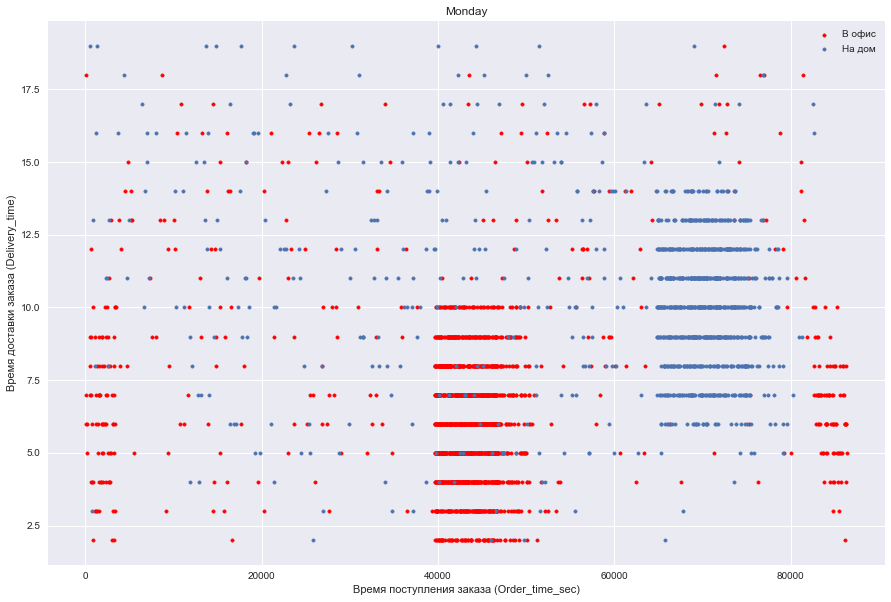

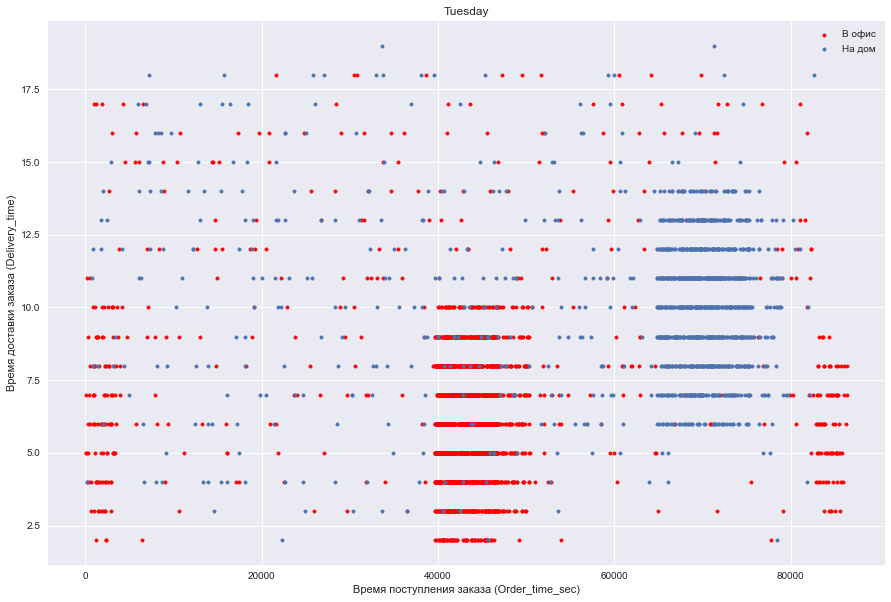

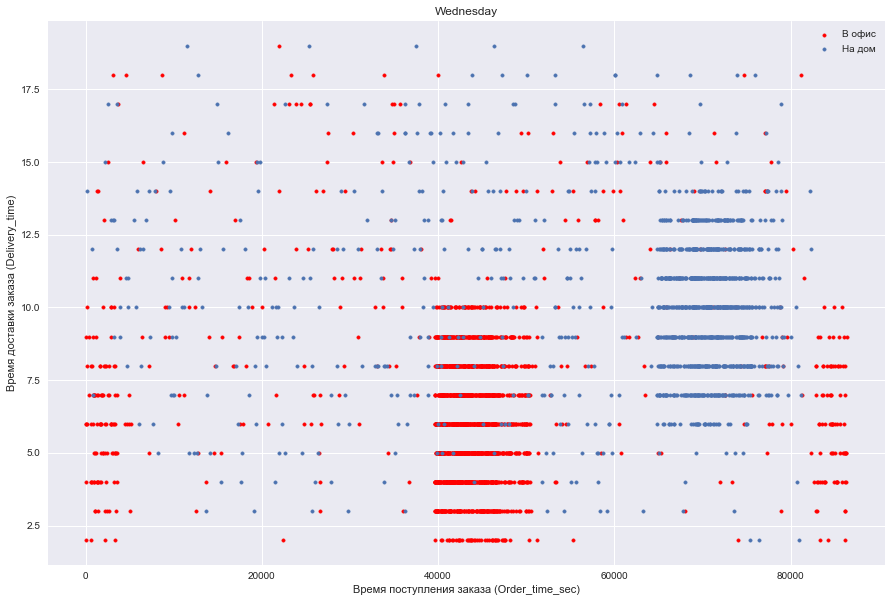

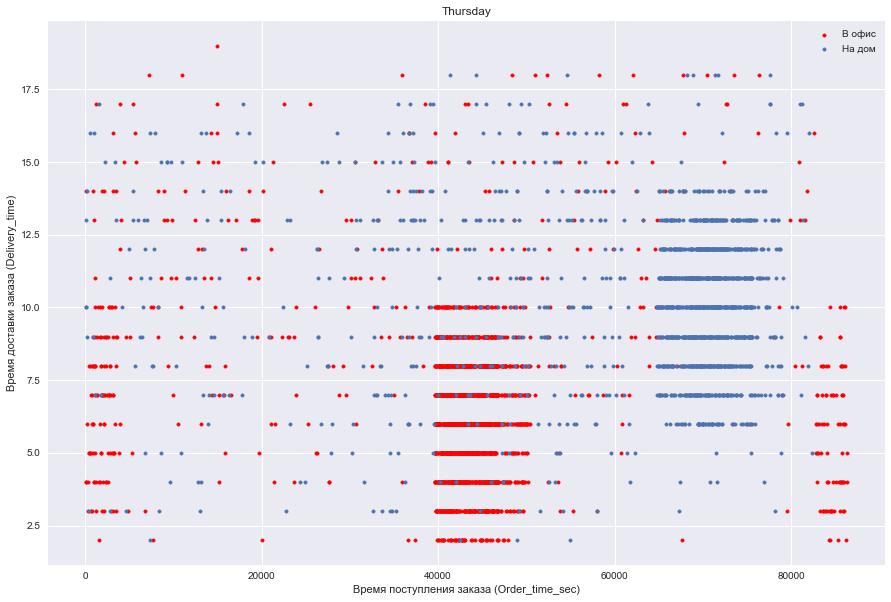

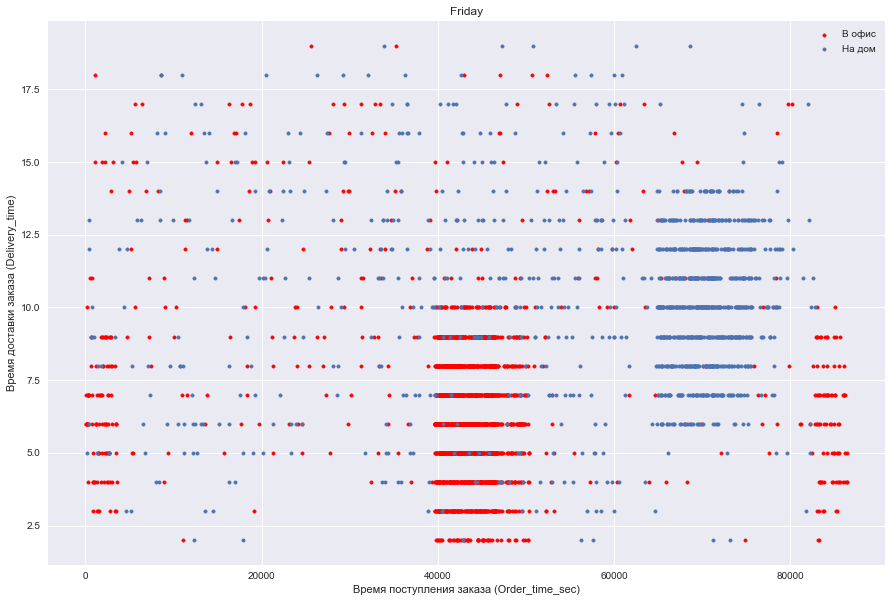

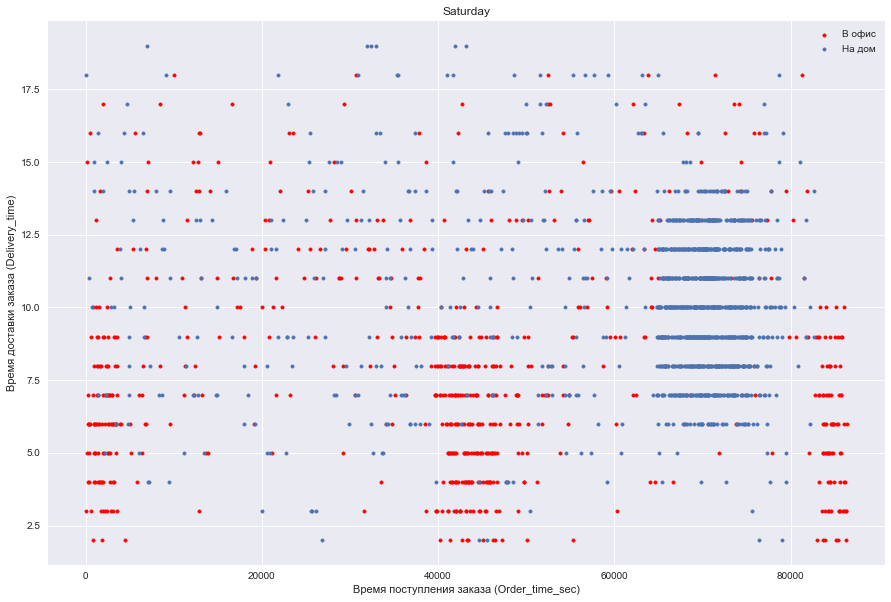

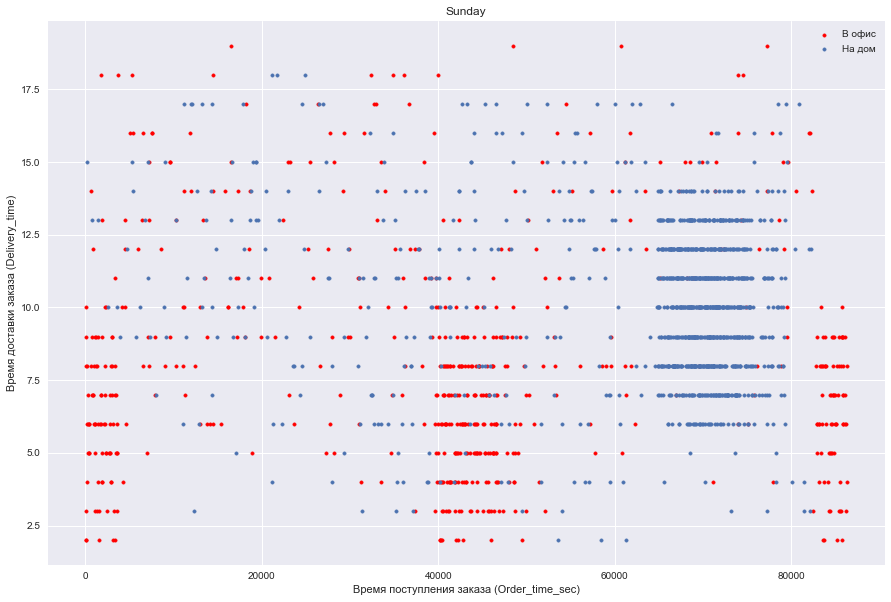

In [56]:
"""Графики распределения заказов по дням недели"""
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, j in enumerate(weekday):
    dff = df[df.day_of_the_week == i+1]
    plt.scatter(dff.Order_time_sec[dff.Office == 1], dff.Delivery_time[dff.Office == 1], 
                marker = '.', color = 'red')
    plt.scatter(dff.Order_time_sec[dff.Office == 0], dff.Delivery_time[dff.Office == 0], marker = '.')
    plt.title(j)
    plt.legend(['В офис', 'На дом'])
    plt.xlabel('Время поступления заказа (Order_time_sec)')
    plt.ylabel('Время доставки заказа (Delivery_time)')
    plt.show()

---

Визуальный анализ не сильно помог, разве что мы наблюдаем снижение количества заказов из офиса в субботу и воскресенье.

Построим таблицу с аналитической информацией. Для каждого дня недели мы хотим получить аналитическую информацию об общем количестве заказов, количестве заказов в офис и количестве заказов на дом. Информация будет о среднем, максимальном и минимальном количестве заказов при условии наличия и отсутствия дождя:

In [57]:
"""Формирование названий строк и столбцов таблицы"""

mltindex = pd.DataFrame(columns = [['Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday', 'Wednesday', 
                                     'Wednesday', 'Wednesday', 'Thursday', 'Thursday', 'Thursday', 'Friday', 
                                     'Friday', 'Friday', 'Saturday', 'Saturday', 'Saturday', 'Sunday', 'Sunday', 
                                     'Sunday'], ['total', 'to_office', 'to_home']*7],
                          index = [['rain', 'rain', 'rain', 'no_rain', 'no_rain', 'no_rain'],
                                   ['mean_order', 'max_order', 'min_order']*2])
mltindex

Monday                   Tuesday                    \
                    total to_office to_home   total to_office to_home   
rain    mean_order    NaN       NaN     NaN     NaN       NaN     NaN   
        max_order     NaN       NaN     NaN     NaN       NaN     NaN   
        min_order     NaN       NaN     NaN     NaN       NaN     NaN   
no_rain mean_order    NaN       NaN     NaN     NaN       NaN     NaN   
        max_order     NaN       NaN     NaN     NaN       NaN     NaN   
        min_order     NaN       NaN     NaN     NaN       NaN     NaN   

                   Wednesday                   Thursday                    \
                       total to_office to_home    total to_office to_home   
rain    mean_order       NaN       NaN     NaN      NaN       NaN     NaN   
        max_order        NaN       NaN     NaN      NaN       NaN     NaN   
        min_order        NaN       NaN     NaN      NaN       NaN     NaN   
no_rain mean_order       NaN       NaN     NaN      NaN       NaN     NaN   
        max_order        NaN       NaN     NaN      NaN       NaN     NaN   
        min_order        NaN       NaN     NaN      NaN       NaN     NaN   

                   Friday                   Saturday                   Sunday  \
                    total to_office to_home    total to_office to_home  total   
rain    mean_order    NaN       NaN     NaN      NaN       NaN     NaN    NaN   
        max_order     NaN       NaN     NaN      NaN       NaN     NaN    NaN   
        min_order     NaN       NaN     NaN      NaN       NaN     NaN    NaN   
no_rain mean_order    NaN       NaN     NaN      NaN       NaN     NaN    NaN   
        max_order     NaN       NaN     NaN      NaN       NaN     NaN    NaN   
        min_order     NaN       NaN     NaN      NaN       NaN     NaN    NaN   

                                      
                   to_office to_home  
rain    mean_order       NaN     NaN  
        max_order        NaN     NaN  
        min_order        NaN     NaN  
no_rain mean_order       NaN     NaN  
        max_order        NaN     NaN  
        min_order        NaN     NaN

In [58]:
"""Заполнение таблицы значениями"""

def mean_max_min(df):
    s = []
    for j in df.Order_date.unique():
        s.append(len(df[df.Order_date == j]))
    if len(s) == 0:
        return np.nan, np.nan, np.nan
    return int(round(sum(s)/len(s),0)), max(s), min(s)

def analysis(df, col):
    weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_day = df[df.day_of_the_week == weekday.index(col[0])+1]
    if col[1] == 'to_office':
        df_day = df_day[df_day.Office == 1]
    elif col[1] == 'to_home':
        df_day = df_day[df_day.Office == 0]
    c = []
    c.extend(mean_max_min(df_day[df_day.Rain == 1]))
    c.extend(mean_max_min(df_day[df_day.Rain == 0]))
    return c
    
for j in mltindex.columns:
    mltindex[j] = analysis(df, j)
    
mltindex

Monday                   Tuesday                    \
                    total to_office to_home   total to_office to_home   
rain    mean_order    435       230     206     446       226     221   
        max_order     452       245     207     458       227     234   
        min_order     418       214     204     435       224     208   
no_rain mean_order    351       227     123     373       239     134   
        max_order     374       244     130     387       250     144   
        min_order     328       208     119     346       213     129   

                   Wednesday                   Thursday                    \
                       total to_office to_home    total to_office to_home   
rain    mean_order       452       235     217      457       234     222   
        max_order        482       255     227      481       250     243   
        min_order        421       215     206      426       212     213   
no_rain mean_order       357       233     124      352       222     130   
        max_order        367       240     136      364       237     137   
        min_order        348       226     116      343       211     121   

                   Friday                   Saturday                   Sunday  \
                    total to_office to_home    total to_office to_home  total   
rain    mean_order    410       233     177      314        78     236    310   
        max_order     426       247     190      325        80     245    324   
        min_order     399       223     168      304        76     228    295   
no_rain mean_order    326       222     104      198        73     125    202   
        max_order     348       237     111      219        85     141    215   
        min_order     311       214      91      182        58     111    190   

                                      
                   to_office to_home  
rain    mean_order        84     225  
        max_order         89     244  
        min_order         80     206  
no_rain mean_order        69     133  
        max_order         73     150  
        min_order         65     121

---

Проанализировав полученную таблицу мы сможем заполнить пропущенные значения в тестовом датасете. А если дней, у которых пропущены значения не 3, а больше? и ручное заполнение займет много времени? Построим классификатор, который поможет предсказть был ли дождь в определенный день или нет

---

Визуальный анализ показал, что день недели может повлиять на классификацию заказа. В текущем представлении данные о дне недели нельзя использовать при обучении классификатора. Их можно преобразовать так же как и время через синус и косинус, а можно создать столбцы дней недели и проставить нули и единицы, свидетельствующие о принадлежности заказа к соответствующему дню недели:

In [59]:
"""Преобразование дня недели"""
def day_to_day(df):
    for i,j in enumerate(weekday):
        df[j] = [1 if d == i+1 else 0 for d in df.day_of_the_week]
    return df

df = day_to_day(df)
df_15 = day_to_day(df_15)

In [60]:
#нахожу дни по которым нет данных
df_15.Order_date[pd.isnull(df_15.Rain)].unique()

array(['2020-11-13', '2020-11-14', '2020-11-15'], dtype=object)

0.7377049180327869

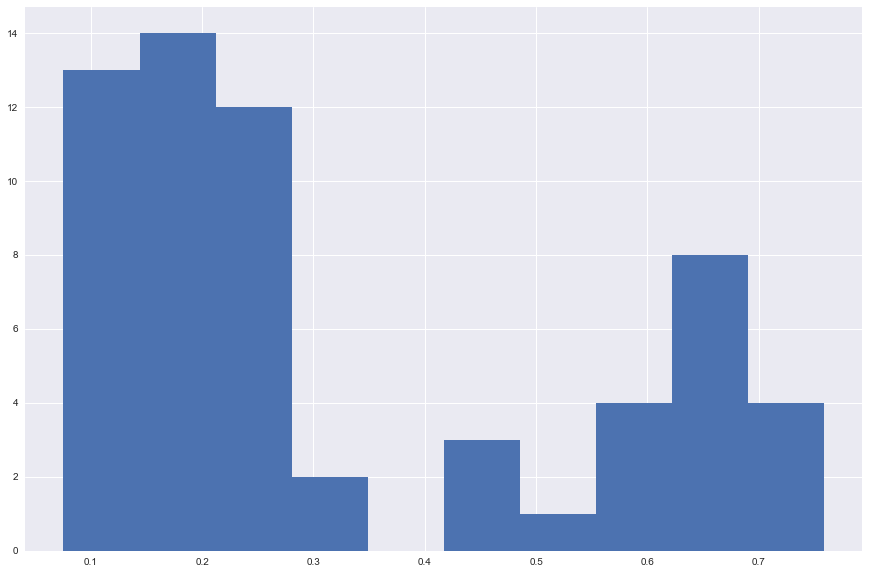

In [61]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm
from sklearn.metrics import f1_score

#создаю вспомогательные датасет, на котором построю логистическую регрессию и предскажу был ли дождь в эти дни или нет
df_help=df.groupby(['Rain', 'day_of_the_week', 'Order_date'], as_index=False) \
    .agg(Orders=('Order_time' , 'count'),
    Office = ('Office' , 'sum'))
df_help["Home"]=df_help["Orders"]-df_help["Office"]
df_help["weekends"]=df_help.day_of_the_week.apply(lambda x: 1 if x == 6 or x == 7 else 0)
df_help["Home"]=np.log(df_help["Home"])
df_help["Office"]=np.log(df_help["Office"])
X=df_help[['Office', 'Home', 'weekends']]
y=df_help['Rain']
clf = LogisticRegression(random_state=21).fit(X, y)
y_pred=clf.predict_proba(X)
pd.Series(y_pred[:,1]).hist()
y_pred = np.where(y_pred[:, 1]>0.7, 1, 0)
f1_score(y, y_pred, average='micro')

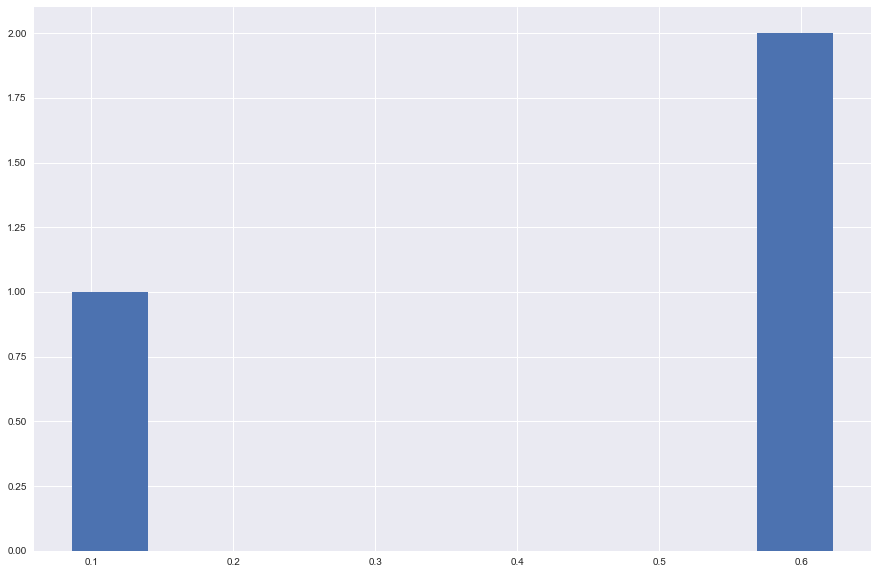

In [62]:
#предсказываю дождь
df_15["weekends"]=df_15.day_of_the_week.apply(lambda x: 1 if x == 6 or x == 7 else 0)
df_15_helpfull=df_15[pd.isnull(df_15.Rain)]
df_15_help=df_15_helpfull.groupby(['day_of_the_week', 'Order_date'], as_index=False) \
    .agg(Orders=('Order_time' , 'count'),
    Office = ('Office' , 'sum'))
df_15_help["Home"]=df_15_help["Orders"]-df_15_help["Office"]
df_15_help["weekends"]=df_15_help.day_of_the_week.apply(lambda x: 1 if x == 6 or x == 7 else 0)
df_15_help["Home"]=np.log(df_15_help["Home"])
df_15_help["Office"]=np.log(df_15_help["Office"])
Xnan=df_15_help[['Office', 'Home', 'weekends']]
y_prednan=clf.predict_proba(Xnan)
pd.Series(y_prednan[:,1]).hist()
y_prednan = np.where(y_prednan[:, 1]>0.5, 1, 0)
df_15_help['Rain']=y_prednan

In [63]:
Xnan

,Office,Home,weekends
0,5.480639,4.543295,0
1,4.343805,5.438079,1
2,4.304065,5.488938,1


In [64]:
y_prednan

array([0, 1, 1])

In [65]:
#заполняю пропуски
df_15_helpfull['Rain']=df_15_helpfull.Order_date.apply(lambda x: 0 if x == "2020-11-13" else 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
#получаю общую таблицу
df_15=df_15[pd.notnull(df_15.Rain)]
result=pd.concat([df_15, df_15_helpfull], sort=False)
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in weekday:
    result.pop(i)
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in weekday:
    df.pop(i)
df["weekends"]=df.day_of_the_week.apply(lambda x: 1 if x == 6 or x == 7 else 0)

In [67]:
#функция, которая показывает результаты
def Processing_results(sc, lr, df, target, attribute_name, name, add_schedule = []):
    X_std = sc.transform(df[attribute_name])
    new_col_name = []
    for i, col_name in enumerate(attribute_name):
        s = col_name + '_std_' + name
        df[s] = X_std[:,i]
        new_col_name.append(s)
    y_pred = 'y_pred_' + name
    Correct = 'Correct_' + name
    df[y_pred] = lr.predict(X_std)
    df[Correct] = df.Office == df[y_pred]
    print(classification_report(df.Office, df[y_pred]))

In [68]:
#меняю время
def time_change(df):
    max_time_delivery=df.query("Office==0").Order_time_sec.max()
    delta = 24*60*60-max_time_delivery
    df['Order_time_sec_delta']=df['Order_time_sec']+delta
    df['Order_time_sec_delta']=df.Order_time_sec_delta.apply(lambda x: x - 86400 if x > 86400 else x)
    return(df)

In [69]:
df=time_change(df)
result=time_change(result)

In [70]:
#добавляю синусы/косинусы в качестве дополнительних харктеристик, которые помогут улучшить качество модели
df['Delta_sin_new'] = np.sin(df.Order_time_sec_delta*math.pi/43200)
df['Delta_cos_new'] = np.cos(df.Order_time_sec_delta*math.pi/43200)

In [71]:
#строю логит-модель
y = df.Office
X = df[['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time','Rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(random_state=21)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2332
           1       0.88      0.88      0.88      2866

    accuracy                           0.87      5198
   macro avg       0.87      0.87      0.87      5198
weighted avg       0.87      0.87      0.87      5198



In [72]:
#логит модель на тестовой выборке
result['Delta_sin_new'] = np.sin(result.Order_time_sec_delta*math.pi/43200)
result['Delta_cos_new'] = np.cos(result.Order_time_sec_delta*math.pi/43200)

y_test = 'Office'
X_test = ['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']
x_test = ['Delta_cos_new', 'Delivery_time']
df_logit = Processing_results(sc, lr, result, y_test, X_test, 'logit', [x_test])

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2767
           1       0.86      0.86      0.86      2706

    accuracy                           0.86      5473
   macro avg       0.86      0.86      0.86      5473
weighted avg       0.86      0.86      0.86      5473



Обучим модель с помощью деревья решений
---

In [73]:
#строю дерево решений
y2 = df.Office
X2 = df[['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
sc2 = StandardScaler()
sc2.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
tree = DecisionTreeClassifier(random_state=21, max_depth=4)
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2332
           1       0.94      0.89      0.91      2866

    accuracy                           0.91      5198
   macro avg       0.91      0.91      0.91      5198
weighted avg       0.91      0.91      0.91      5198



In [74]:
#применяю дерево решений для теста
y_test = 'Office'
X_test = ['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']
x_test = ['Delta_cos_new', 'Delivery_time']
df_tree = Processing_results(sc2, tree, result, y_test, X_test, 'tree', [x_test])

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2767
           1       0.93      0.85      0.89      2706

    accuracy                           0.90      5473
   macro avg       0.90      0.90      0.90      5473
weighted avg       0.90      0.90      0.90      5473



In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_rf=RandomForestClassifier()
parameters={'n_estimators':[65, 75, 85],
    'max_depth':[3, 4, 7, 8, 9, 10], 'min_samples_split':[50, 200, 400, 800],
           'min_samples_leaf':[325, 350, 400, 1000, 3000], 
            'bootstrap' : ['True', 'False'], 
            'max_features': ['auto', 'sqrt']}
grid_search = RandomizedSearchCV(clf_rf, parameters, cv=5, scoring='f1')
grid_search.fit(X, y) 
grid_search.best_params_

{'n_estimators': 85,
 'min_samples_split': 200,
 'min_samples_leaf': 350,
 'max_features': 'auto',
 'max_depth': 7,
 'bootstrap': 'False'}

In [77]:
y2 = df.Office
X2 = df[['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
sc3 = StandardScaler()
sc3.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf_rf=RandomForestClassifier(n_estimators= 75,
 min_samples_split = 50,
 min_samples_leaf= 325,
 max_depth= 3, bootstrap= 'True', max_features = 'auto')
clf_rf.fit(X_train_std, y_train)
y_pred = clf_rf.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2332
           1       0.88      0.91      0.89      2866

    accuracy                           0.88      5198
   macro avg       0.88      0.88      0.88      5198
weighted avg       0.88      0.88      0.88      5198



In [78]:
y_test = 'Office'
X_test = ['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']
x_test = ['Delta_cos_new', 'Delivery_time']
clf_rf = Processing_results(sc3, clf_rf, result, y_test, X_test, 'RF', [x_test])

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2767
           1       0.84      0.89      0.87      2706

    accuracy                           0.86      5473
   macro avg       0.86      0.86      0.86      5473
weighted avg       0.87      0.86      0.86      5473



---

randon_forest показывает результаты хуже чем простое дерево решений, потому что переобучается

---

In [80]:
clf_rf=RandomForestClassifier()
parameters={'n_estimators':[1],
    'max_depth':[3, 4, 7, 8, 9, 10], 'min_samples_split':[50, 200, 400, 800],
           'min_samples_leaf':[325, 350, 400, 1000, 3000]}
grid_search = GridSearchCV(clf_rf, parameters, cv=5)
grid_search.fit(X, y) 
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 350,
 'min_samples_split': 50,
 'n_estimators': 1}

In [81]:
y2 = df.Office
X2 = df[['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
sc3 = StandardScaler()
sc3.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf_rf=RandomForestClassifier(n_estimators= 1,
 min_samples_split = 2,
 min_samples_leaf= 2,
 max_depth= 15)
clf_rf.fit(X_train_std, y_train)
y_pred = clf_rf.predict(X_test_std)
print(classification_report(y_test, y_pred))
y_test = 'Office'
X_test = ['Delta_sin_new', 'Delta_cos_new', 'weekends', 'Delivery_time', 'Rain']
x_test = ['Delta_cos_new', 'Delivery_time']
clf_rf = Processing_results(sc3, clf_rf, result, y_test, X_test, 'RF', [x_test])

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2332
           1       0.91      0.88      0.90      2866

    accuracy                           0.89      5198
   macro avg       0.88      0.89      0.89      5198
weighted avg       0.89      0.89      0.89      5198

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2767
           1       0.87      0.86      0.86      2706

    accuracy                           0.87      5473
   macro avg       0.87      0.87      0.87      5473
weighted avg       0.87      0.87      0.87      5473



---

при max_depth > 3 дерево переобучается
модели становятся максимально переобученными при max_depth и min min_samples_leaf min_samples_split

А теперь обучим модель по ближайшим соседям
---

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

Получим следующие результаты по тестовой выборке

In [85]:
df_knn = Processing_results(sc2, knn, result, y_test, X_test, 'knn', [x_test])

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2767
           1       0.92      0.87      0.89      2706

    accuracy                           0.90      5473
   macro avg       0.90      0.90      0.90      5473
weighted avg       0.90      0.90      0.90      5473



Посмотрим, какой значение параметра оптимальное 

In [86]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
grid.fit(X, y)
grid.best_params_

{'n_neighbors': 8}

In [87]:
leaf_size = list(range(1,25))
n_neighbors = list(range(7,8))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
res = GridSearchCV(knn_2, hyperparameters, cv=3)
best_model = res.fit(X,y)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 14
Best p: 2
Best n_neighbors: 7


In [92]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsClassifier(n_neighbors=7, p=2, leaf_size=14)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

In [93]:
df_knn = Processing_results(sc2, knn, result, y_test, X_test, 'knn', [x_test])

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2767
           1       0.90      0.88      0.89      2706

    accuracy                           0.90      5473
   macro avg       0.90      0.90      0.90      5473
weighted avg       0.90      0.90      0.90      5473



На этих данных при изменении гиперпараметров результаты метрик почти не изменяются